In [3]:
import pandas as pd
import glob
import os

path = r'/Users/marco/Library/CloudStorage/OneDrive-HertieSchool/Thesis/GitHub/thesis/data/raw2022' 
all_files = glob.glob(os.path.join(path , "*.csv"))

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [4]:
frame = frame[(frame.Land == 'Deutschland')]
frame.shape

(23204, 25)

In [5]:
frame = frame[(frame['Ziel der Beihilfe'] == 'Behebung einer beträchtlichen Störung im Wirtschaftsleben eines Mitgliedstaats') ]

In [62]:
frame.to_csv(r'/Users/marco/Library/CloudStorage/OneDrive-HertieSchool/Thesis/GitHub/thesis/data/raw/all_companies', index=False, header=True)

In [6]:
list(frame.columns)

['Land',
 'Begünstigter in anderem Mitgliedstaat',
 'Titel der Beihilfemaßnahme',
 'Titel der Beihilfemaßnahme [EN]',
 'SA.Nummer',
 'Kennung',
 'Nationale Kennung',
 'Name des Beihilfeempfängers',
 'Name des Beihilfeempfängers [EN]',
 'Art des Beihilfeempfängers',
 'Region',
 'Wirtschaftszweig (NACE)',
 'Beihilfeinstrument',
 'Beihilfeinstrument [EN]',
 'Ziel der Beihilfe',
 'Ziel der Beihilfe [EN]',
 'Nominalbetrag',
 'Beihilfeelement, in voller Höhe',
 'Währung',
 'Tag der Gewährung',
 'Name der Bewilligungsbehörde',
 'Name der Bewilligungsbehörde [EN]',
 'Veröffentlicht am',
 'Betraute Einrichtung',
 'Finanzintermediäre']

In [7]:
frame.groupby('Ziel der Beihilfe').count()['Land'].sort_values(ascending=False).head(15)

Ziel der Beihilfe
Behebung einer beträchtlichen Störung im Wirtschaftsleben eines Mitgliedstaats    20364
Name: Land, dtype: int64

In [8]:
frame.groupby('Beihilfeinstrument').count()['Land'].sort_values(ascending=False)

Beihilfeinstrument
Zuschuss                                 15206
Zinsgünstiges Darlehen                    5039
Andere Formen der Kapitalintervention       97
Bürgschaft                                  17
Eigenkapitalinstrumente                      4
Sonstiges (bitte angeben)                    1
Name: Land, dtype: int64

In [9]:
frame.groupby('Name der Bewilligungsbehörde').count()['Land'].sort_values(ascending=False).head(40)

Name der Bewilligungsbehörde
Kreditanstalt für Wiederaufbau                                                       5033
IHK für München und Oberbayern                                                       4625
IBB                                                                                  1857
RP Gießen                                                                            1636
Bezirksregierung Düsseldorf                                                          1625
Bezirksregierung Münster                                                              992
Bezirksregierung Arnsberg                                                             703
Investitionsbank Schleswig-Holstein                                                   688
Bezirksregierung Detmold                                                              468
Investitions- und Strukturbank Rheinland-Pfalz                                        466
Hamburgische Investitions- und Förderbank                              

In [10]:
frame["Nominalbetrag"] = frame["Nominalbetrag"].apply(float)
frame["Beihilfeelement, in voller Höhe"] = frame["Beihilfeelement, in voller Höhe"].apply(float)


<Axes: xlabel='Tag der Gewährung'>

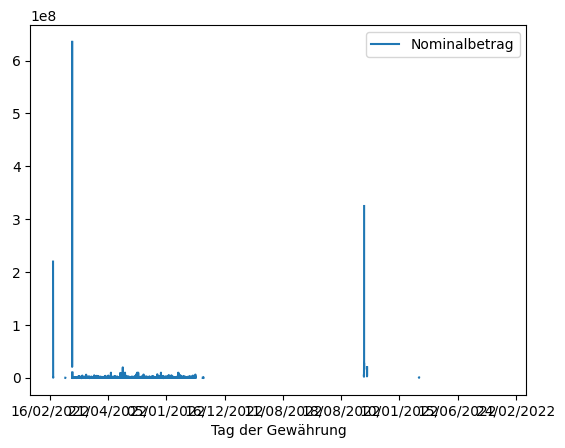

In [11]:
frame.plot(x="Tag der Gewährung", y=["Nominalbetrag"])

<Axes: xlabel='Tag der Gewährung'>

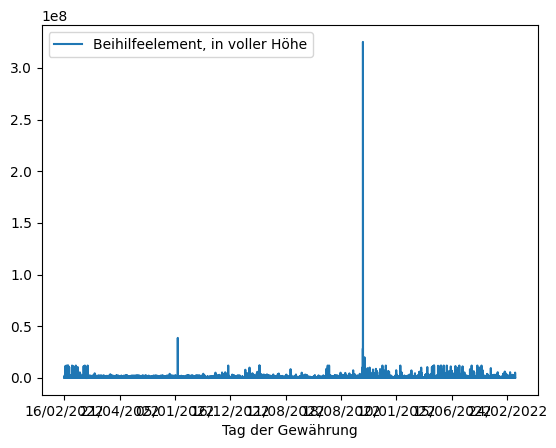

In [12]:

frame.plot(x="Tag der Gewährung", y=["Beihilfeelement, in voller Höhe"])

In [14]:
frame["Tag der Gewährung"] = pd.to_datetime(frame["Tag der Gewährung"], infer_datetime_format=True)

<Axes: xlabel='Tag der Gewährung'>

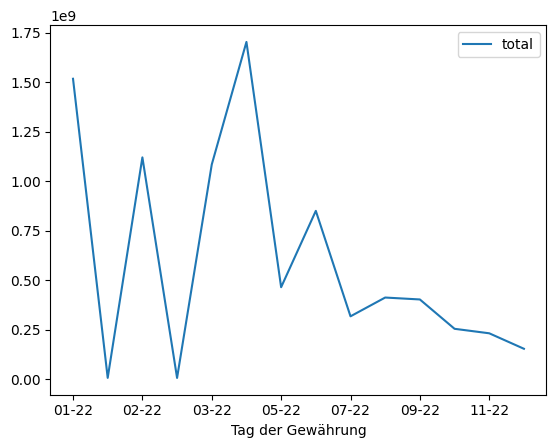

In [15]:
frame.groupby(frame["Tag der Gewährung"].dt.strftime('%m-%y')).agg (total = ("Beihilfeelement, in voller Höhe" , 'sum')).plot()

In [88]:
frame.to_csv(r'/Users/marco/Library/CloudStorage/OneDrive-HertieSchool/Thesis/GitHub/thesis/data/main/all_companies.csv', index=False, header=True)

In [16]:
frame = frame[['Name des Beihilfeempfängers','Nationale Kennung']].drop_duplicates()
frame = frame.reset_index(drop=True, names='index')
frame.index = frame.index.rename('Index')
frame['Status'] = ''
frame

,Name des Beihilfeempfängers,Nationale Kennung,Status
Index,,,
0,Hotel Residenz GmbH & Co KG,DE297338368,
1,Verve GmbH,HRB17519,
2,JP KOM GmbH,DE208324734,
3,SMG Entertainment Deutschland GmbH,DE169783800,
4,KLARTEXT Grafik Messe Event GmbH,DE175516812,
...,...,...,...
17263,Global Bulk Logistic GmbH,DE814678847,
17264,TRIDELTA Weichferrite GmbH,HRB502785,
17265,Energieanlagen Greifswald GmbH,HRB 20492,


In [17]:
frame.index += 102983 

In [18]:
frame

,Name des Beihilfeempfängers,Nationale Kennung,Status
Index,,,
102983,Hotel Residenz GmbH & Co KG,DE297338368,
102984,Verve GmbH,HRB17519,
102985,JP KOM GmbH,DE208324734,
102986,SMG Entertainment Deutschland GmbH,DE169783800,
102987,KLARTEXT Grafik Messe Event GmbH,DE175516812,
...,...,...,...
120246,Global Bulk Logistic GmbH,DE814678847,
120247,TRIDELTA Weichferrite GmbH,HRB502785,
120248,Energieanlagen Greifswald GmbH,HRB 20492,


In [20]:
frame.to_csv(r'/Users/marco/Library/CloudStorage/OneDrive-HertieSchool/Thesis/GitHub/thesis/data/main/companies2.csv', sep='$' , index=True, header=True)

In [19]:
frame.shape

(17268, 3)

In [21]:
names = pd.read_csv('data/main/companies.csv',sep='$')
names

,Index,Name des Beihilfeempfängers,Nationale Kennung,Status
0,0,Eurocaribe Druck und Verlag GnbH,45/719/00411,NaN
1,1,K-motion GmbH & Co. KG,43/637/00859,NaN
2,2,Künstlermanagement Uwe Kanthak,48/635/01062,NaN
3,3,Do it! Sprachreisen OHG,42/613/02646,NaN
4,4,HCK Holding GmbH,48/747/06065,NaN
...,...,...,...,...
102978,102978,Milchproduktion Kreinitz GmbH,Betriebsnummer 6273600025,NaN
102979,102979,Jürgen Schirra,Betriebsnummer 072351140011,NaN
102980,102980,Milchproduktion Wildenborn KG,HRA 34143 Stendal,NaN
102981,102981,a) Weingut Bergdolt-Reif & Nett GmbH&Co.KG,HRA 61393 Ludwigshafen a. Rhein,NaN


In [22]:
names2 = pd.read_csv('data/main/companies2.csv',sep='$')
names2

,Index,Name des Beihilfeempfängers,Nationale Kennung,Status
0,102983,Hotel Residenz GmbH & Co KG,DE297338368,NaN
1,102984,Verve GmbH,HRB17519,NaN
2,102985,JP KOM GmbH,DE208324734,NaN
3,102986,SMG Entertainment Deutschland GmbH,DE169783800,NaN
4,102987,KLARTEXT Grafik Messe Event GmbH,DE175516812,NaN
...,...,...,...,...
17263,120246,Global Bulk Logistic GmbH,DE814678847,NaN
17264,120247,TRIDELTA Weichferrite GmbH,HRB502785,NaN
17265,120248,Energieanlagen Greifswald GmbH,HRB 20492,NaN
17266,120249,Hotel Gude GmbH & Co. KG,DE282139186,NaN


In [23]:
names3 = pd.concat([names, names2])
names3

,Index,Name des Beihilfeempfängers,Nationale Kennung,Status
0,0,Eurocaribe Druck und Verlag GnbH,45/719/00411,NaN
1,1,K-motion GmbH & Co. KG,43/637/00859,NaN
2,2,Künstlermanagement Uwe Kanthak,48/635/01062,NaN
3,3,Do it! Sprachreisen OHG,42/613/02646,NaN
4,4,HCK Holding GmbH,48/747/06065,NaN
...,...,...,...,...
17263,120246,Global Bulk Logistic GmbH,DE814678847,NaN
17264,120247,TRIDELTA Weichferrite GmbH,HRB502785,NaN
17265,120248,Energieanlagen Greifswald GmbH,HRB 20492,NaN
17266,120249,Hotel Gude GmbH & Co. KG,DE282139186,NaN


In [24]:
names3.to_csv(r'/Users/marco/Library/CloudStorage/OneDrive-HertieSchool/Thesis/GitHub/thesis/data/main/companies3.csv', sep='$' , index=True, header=True)